# Practical Training 2

In this exercise you will learn how to
* convert a color image to a greyscale image
* manually calculate a histogram and plot the result

At the beginning of a notebook, we typically import all relevant modules. So, please execute the following cell.

In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pylab as plt

Thank you :)

The following is just a convenient function to display a 2D image.

In [46]:
def myshow2d(image):
    """
    Displays a 2D sitk image.
    """
    #img = sitk.GetArrayFromImage(image)
    plt.imshow(image, cmap="Greys_r" if len(image.shape)==2 else "brg")
    plt.show()

## Color -> Greyscale conversion

In the lecture you learned about two ways to convert a color image to a grayscale image. In this exercise you will implement both conversions.

**Task:** Please download the image "Fundus.png" by executing the following cell.

In [3]:
import urllib.request
_,_ = urllib.request.urlretrieve("https://fh-aachen.sciebo.de/s/6CgiEuNWNnDmjfV/download", "Fundus.png")

**Task:** Now read the image "Fundus.png" and display it using the function ```myshow2d```.

Hint: You did it already in the first practical training.

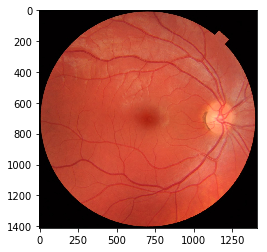

In [28]:
fundus = sitk.ReadImage('Fundus.png')
img = sitk.GetArrayFromImage(fundus)
myshow2d(img)

**Task:** Implement the following function. 

Note: 
* A possible solution needs around 4-7 lines of code.
* The function expects an image in SimpleITK format, but your calculations should be performed using a numpy array.
* The result should be returned as SimpleITK image (```sitk.GetImageFromArray(...)```)
* Maybe you should cast the datatype to "uint16" before doing the calculations (```np.uint16(...)```) and at the end back to "uint8" (```np.uint8(...)```).
* You can create a new empty image with ```np.zeros((x_size, y_size), dtype="uint8")```
* You can get the dimensions of a numpy array using ```.shape```

In [52]:
def convert_to_grayscale_avg(image):
    """
    This function converts a color image into a grayscale image by averaging its color channels.
    
    Input:
        image : SimpleITK image
        
    returns:
        SimpleITK image
    """
    
    r = np.array(image[:,:,0])
    g = np.array(image[:,:,1])
    b = np.array(image[:,:,2])
    gray = (r + g + b)/3
    
    return gray

Now lets call your function to see what it returns.

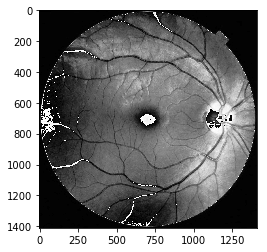

In [53]:
myshow2d(convert_to_grayscale_avg(img))

**Task:** Now implement the grayscale conversion using the ITU function.

In [54]:
def convert_to_grayscale_itu(image):
    """
    This function converts a color image into a grayscale image using the equation defined by ITU
    
    Input:
        image : SimpleITK image
        
    returns:
        SimpleITK image
    """
    
    r = np.array(image[:,:,0])
    g = np.array(image[:,:,1])
    b = np.array(image[:,:,2])
    gray = 0.2126*r + 0.7152*g + 0.0722*b

    return gray

Lets see how the result looks like. Please execute the following cell.

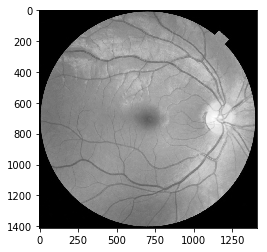

In [55]:
myshow2d(convert_to_grayscale_itu(img))

Do you see a difference?

## Histograms

Now that we can convert a color image to a grayscale image, we can calculate its grayscale histogram. Lets do it.

There are ready to use functions available to calculate histograms (plt.hist, np.histogram), but we do not want to use them here, but learn to calculate histograms by ourselves.

**Task:** Implement the following function which calculates the grayscale histogram of a grayscale image.

Note:
* A possible solution iterates over each pixel of the image. Thus, you need two for/while loops.
* You can implement the function with around 9 lines of code.
* You can assume that the input image is an 8-bit grayscale image.
* Use 255 bins (You can create an empty list with 255 entries as follows: ```my_list = [0]*255```). You can also create a numpy array instead of a list, if you prefer to do so.
* ```nparray.shape[1]``` returns the number of pixels in x direction
* ```nparray.shape[0]``` returns the number of pixels in x direction

In [96]:
def calculate_histogram(image):
    """
    This function calculates the grayscale histogram of the provided image and returns it as a list.
    
    Input:
        image : SimpleITK image (8-bit, grayscale)
        
    Returns:
        The histogram as a list with 255 entries.
        
    """
    hist = np.zeros([1,256])
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            k = np.uint8(image[i,j])
            hist[0,k-1] = hist[0,k-1] + 1    
    return hist

Now execute the following cell. This will call your functions and plots the histogram.

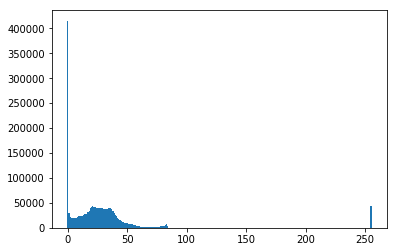

In [110]:
h = calculate_histogram(convert_to_grayscale_avg(img))
plt.bar(np.arange(0,256), np.ravel(h), width=1) # np.ravel is used to flatten 2d-array to 1d-array
plt.show()

**Task:** Modify the previous code cell (the one which plots the result) and do a logarithmic scaling of the histogram.

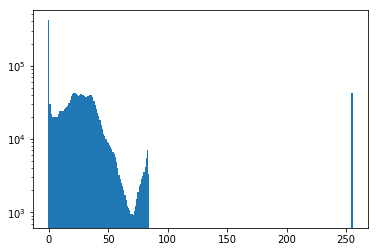

In [112]:
plt.bar(np.arange(0,256), np.ravel(h), width=1, log=True)
plt.show()

That's all :-)